In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

In [13]:
df = pd.read_excel('~/Downloads/house01.xls')
df = df[df['COD_OBL'] == 'Odess'][['CONSUM', 'CASHINC', 'AGE_HEAD']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 2403 to 2813
Data columns (total 3 columns):
CONSUM      411 non-null float64
CASHINC     411 non-null float64
AGE_HEAD    411 non-null int64
dtypes: float64(2), int64(1)
memory usage: 12.8 KB


In [34]:
X = df[['CASHINC', 'AGE_HEAD']]
Y = df['CONSUM']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CONSUM   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           6.53e-52
Time:                        17:23:59   Log-Likelihood:                -3862.4
No. Observations:                 411   AIC:                             7731.
Df Residuals:                     408   BIC:                             7743.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5896.0686    565.531     10.426      0.000    4784.351    7007.786
CASHINC        0.4782      0.029     16.503      0.000       0.421       0.535
AGE_HEAD     -40.4611      9.403     -4.303      0.000     -58.945     -21.977
==============================================================================
Omnibus:                       95.685   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.893
Skew:                           1.207   Prob(JB):                     1.19e-45
Kurtosis:                       5.501   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

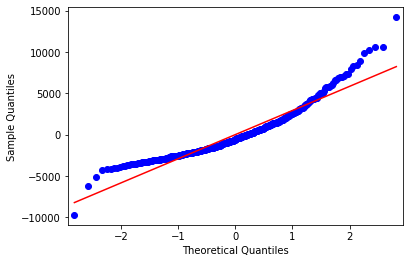

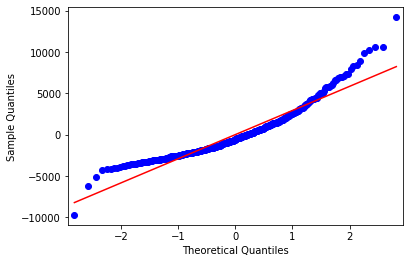

In [18]:
qqplot(results.resid, line='s')

залишки розподілені не нормально

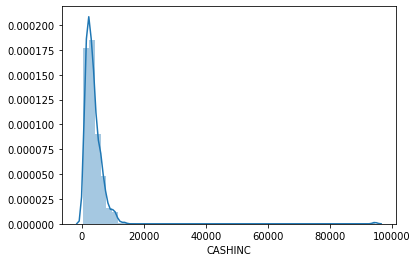

In [20]:
sns.distplot(df['CASHINC'])

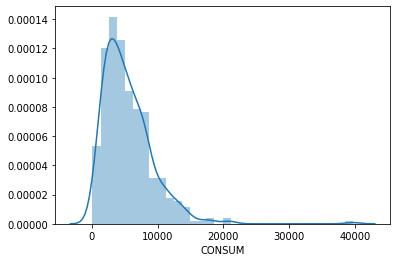

In [21]:
sns.distplot(df['CONSUM'])

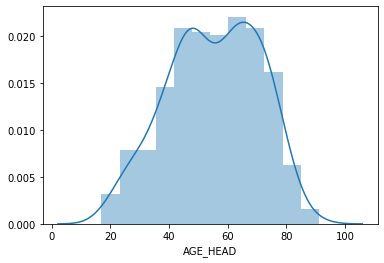

In [22]:
sns.distplot(df['AGE_HEAD'])

спробуємо прологарифмувати змінні CASHINC та CONSUM

In [25]:
df['LogCASHINC'] = np.log(df['CASHINC'])
df['LogCONSUM'] = np.log(df['CONSUM'])

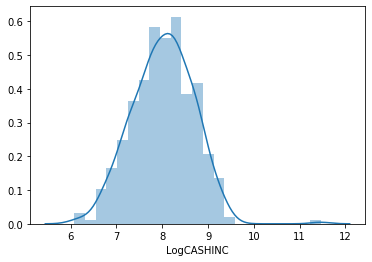

In [26]:
sns.distplot(df['LogCASHINC'])

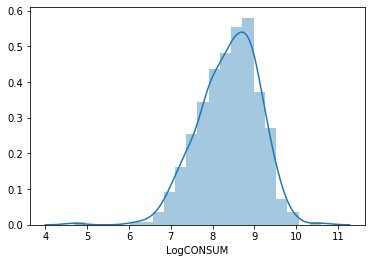

In [27]:
sns.distplot(df['LogCONSUM'])

In [28]:
X = df[['LogCASHINC', 'AGE_HEAD']]
Y = df['LogCONSUM']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogCONSUM   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     203.1
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           6.01e-62
Time:                        17:16:41   Log-Likelihood:                -305.30
No. Observations:                 411   AIC:                             616.6
Df Residuals:                     408   BIC:                             628.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9820      0.354      8.423      0.000       2.286       3.678
LogCASHINC     0.7132      0.039     18.123      0.000       0.636       0.791
AGE_HEAD      -0.0057      0.002     -3.383      0.001      -0.009      -0.002
==============================================================================
Omnibus:                       13.760   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.835
Skew:                          -0.270   Prob(JB):                     4.93e-05
Kurtosis:                       3.931   Cond. No.                         818.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

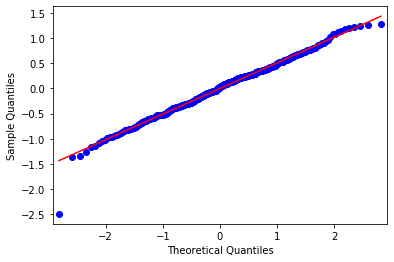

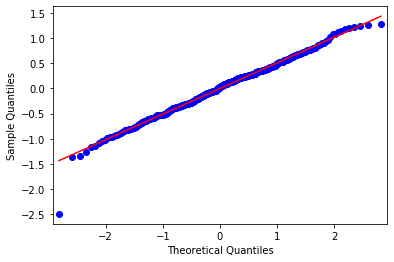

In [29]:
qqplot(results.resid, line='s')

тепер маємо нормально розподілені залишки

In [32]:
plt.rcParams['figure.figsize'] = (10,10)

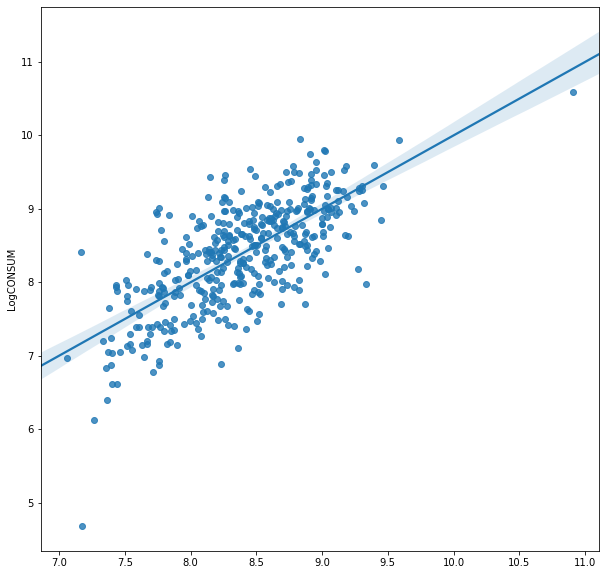

In [33]:
sns.regplot(results.fittedvalues, df['LogCONSUM'])

In [35]:
np.sqrt(results.scale)

2928.6254086820213

Висновок:
lnCONSUM = 2.9820 + 0.7132 * lnCASHINC - 0.0057 * AGE_HEAD + eps, eps~=Norm